In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [ ]:
# Load CSV
csv_path = "E:/Agnese/figures/stages/early_late.csv"
df = pd.read_csv(csv_path)

# Ensure "stage" is categorical for grouping
df["stage"] = pd.Categorical(df["stage"])

# Compute means for each stage
mean_values = df.groupby("stage")["n"].mean()

# Perform statistical test (e.g., t-test)
group1 = df[df["stage"] == df["stage"].unique()[0]]["n"]
group2 = df[df["stage"] == df["stage"].unique()[1]]["n"]
stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test

# Define significance level and assign asterisks
if p_value < 0.001:
    significance = "***"  # p < 0.001
elif p_value < 0.01:
    significance = "**"   # p < 0.01
elif p_value < 0.05:
    significance = "*"    # p < 0.05
else:
    significance = "n.s."  # Not significant

# Choose colors for the violin plot
violin_colors = ["pink", "purple"]  # Modify as needed

# Plot
plt.figure(figsize=(6, 6))

# Create the violin plot with a small boxplot inside (instead of gray area)
sns.violinplot(data=df, x="stage", y="n", palette=violin_colors, inner="box", alpha=0.7)
for patch in plt.gca().collections:
    if isinstance(patch, plt.Rectangle):  # Change the box (the inner boxplot)
        patch.set_edgecolor('gray')
        patch.set_linewidth(2)

# Add mean line for each stage
for i, stage in enumerate(mean_values.index):
    plt.plot([i - 0.2, i + 0.2], [mean_values[stage], mean_values[stage]], color="black", lw=2, label="Mean" if i == 0 else "")

# Add significance annotation (asterisk)
plt.text(0.5, max(df["n"]) + 1, significance, ha='center', fontsize=16, color='black')

# Labels and title
plt.xlabel("border")
plt.ylabel("shift with respect to Her1 max (minutes)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as TIFF
save_directory = "E:/Agnese/figures/stages/early_late/"
save_path = os.path.join(save_directory, "violin_plot_with_boxplot_and_mean.svg")
plt.savefig(save_path, format="svg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

print(f"Plot saved at: {save_path}")
print(f"Statistical significance: {significance} (p = {p_value:.5f})")

C:\Users\fronte\AppData\Local\Temp\21\ipykernel_41484\2392262430.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby("stage")["n"].mean()


AxisError: `axis` is out of bounds for array of dimension 1

C:\Users\fronte\AppData\Local\Temp\21\ipykernel_41484\1343520300.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby("stage")["n"].mean()
C:\Users\fronte\AppData\Local\Temp\21\ipykernel_41484\1343520300.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group["n"].values for name, group in df.groupby("stage")]
C:\Users\fronte\AppData\Local\Temp\21\ipykernel_41484\1343520300.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violi

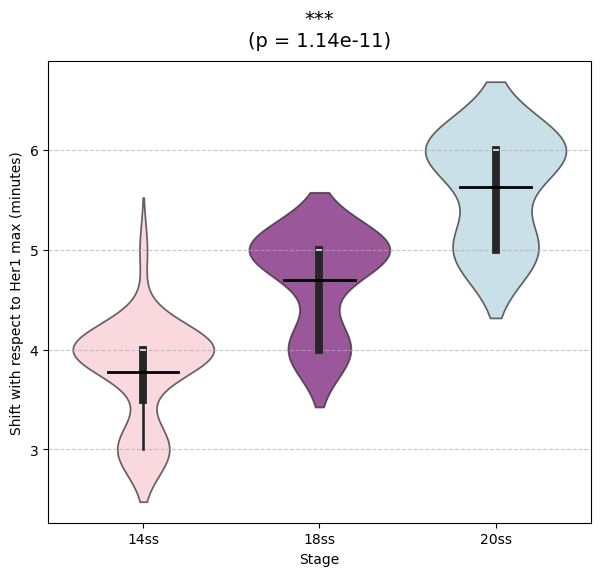

Plot saved at: E:/Agnese/figures/stages\violin_plot_with_boxplot_and_mean.svg
Statistical significance (ANOVA): *** (p = 0.00000)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Load CSV
csv_path = "E:/Agnese/figures/stages/early_late.csv"
df = pd.read_csv(csv_path)

# Ensure "stage" is categorical
df["stage"] = pd.Categorical(df["stage"])

# Compute means for each stage
mean_values = df.groupby("stage")["n"].mean()

# Perform one-way ANOVA for 3 groups
groups = [group["n"].values for name, group in df.groupby("stage")]
stat, p_value = stats.f_oneway(*groups)

# Define significance level and assign asterisks
if p_value < 0.001:
    significance = "***"
elif p_value < 0.01:
    significance = "**"
elif p_value < 0.05:
    significance = "*"
else:
    significance = "n.s."

# Choose colors for three groups
violin_colors = ["pink", "purple", "lightblue"]

# Plot
plt.figure(figsize=(7, 6))
sns.violinplot(data=df, x="stage", y="n", palette=violin_colors, inner="box", alpha=0.7)

# Add mean line for each stage
for i, stage in enumerate(mean_values.index):
    plt.plot([i - 0.2, i + 0.2], [mean_values[stage], mean_values[stage]], 
             color="black", lw=2, label="Mean" if i == 0 else "")

# Add significance annotation (centered across the plot with exact p-value)
plt.text(1, max(df["n"]) + 1, f"{significance}\n(p = {p_value:.3g})", 
         ha='center', va='bottom', fontsize=14, color='black')

# Labels and title
plt.xlabel("Stage")
plt.ylabel("Shift with respect to Her1 max (minutes)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
save_directory = "E:/Agnese/figures/stages"
os.makedirs(save_directory, exist_ok=True)  # Create directory if it doesn't exist
save_path = os.path.join(save_directory, "violin_plot_with_boxplot_and_mean.svg")
plt.savefig(save_path, format="svg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Output summary
print(f"Plot saved at: {save_path}")
print(f"Statistical significance (ANOVA): {significance} (p = {p_value:.5f})")
